# `El Principito` is cheaper than `Harry Potter`

First import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import psycopg2

Define the function that queries the PostgreSQL Database.

In [2]:
def sql_query(string, column):
    host = "localhost"
    user = "postgres"
    password = "password"
    dbname = "booksdb"
    connection = psycopg2.connect(
        host=host, user=user, password=password, dbname=dbname
    )
    cursor = connection.cursor()
    try:
        if column == "name":
            cursor.execute(f"SELECT * FROM books WHERE name like '%{string}%'")
        elif column == "author":
            cursor.execute(f"SELECT * FROM books WHERE author like '%{string}%'")
        records = cursor.fetchall()
        ids = [record[0] for record in records]
        books_prices = []
        for i in ids:
            cursor.execute(f"SELECT price FROM prices WHERE bk_id={i}")
            price = cursor.fetchall()[-1][0]
            books_prices.append(price)
    except:
        connection.rollback()
    cursor.close()
    connection.close()
    return books_prices

And the function that builds the data.

In [3]:
def get_data(words_list, column):
    df = pd.DataFrame(columns=["prices", "words"])
    for i in range(len(words_list)):
        prices = sql_query(words_list[i], column)
        word = pd.Series(data=[words_list[i] for j in range(len(prices))], name="words")
        df_ = pd.DataFrame(data=prices, columns=["prices"])
        df__ = pd.concat([df_, word], axis=1)
        df = pd.concat([df, df__], axis=0)
    return df

We plot the `prices` of all the books containing `el principito` and `harry potter` on its name.

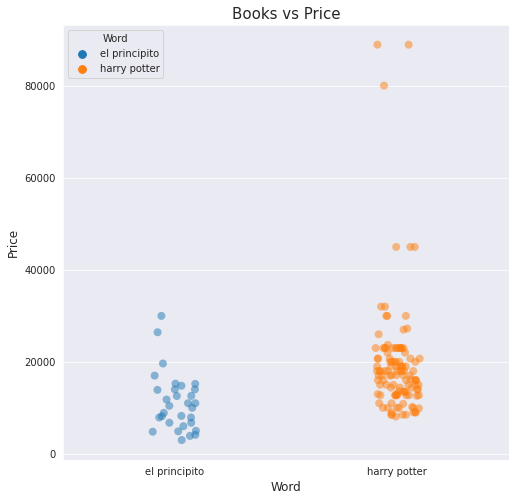

In [4]:
words_list = ["el principito", "harry potter"]
df = get_data(words_list, "name")
fig, ax = plt.subplots(figsize=(8, 8))
#sns.swarmplot(data=df, x="words", y="prices", ax=ax, size=4, alpha=0.8, hue="words")
sns.stripplot(data=df, x="words", y="prices", ax=ax, size=8, alpha=0.5, hue="words")
#sns.boxplot(data=df, x="words", y="prices", ax=ax, hue="words")
ax.set_ylabel("Price", fontsize=12)
ax.set_xlabel("Word", fontsize=12)
ax.set_title("Books vs Price", fontsize=15)
plt.legend(title="Word")
plt.show()

We have the following statistics of books containing `el principito`:

In [5]:
min = np.min(df[df["words"] == "el principito"]["prices"])
print(f"Min: {min}")
q25 = np.quantile(df[df["words"] == "el principito"]["prices"], 0.25)
print(f"25%: {q25:.0f}")
mean = np.mean(df[df["words"] == "el principito"]["prices"])
print(f"Mean: {mean:.0f}")
q75 = np.quantile(df[df["words"] == "el principito"]["prices"], 0.75)
print(f"75%: {q75:.0f}")
max = np.max(df[df["words"] == "el principito"]["prices"])
print(f"Max: {max}")
std = np.std(df[df["words"] == "el principito"]["prices"])
print(f"Standard Deviation: {std:.0f}")

Min: 2990
25%: 6750
Mean: 11160
75%: 14000
Max: 30000
Standard Deviation: 6135


We have the following statistics of books containing `harry potter`:

In [6]:
min = np.min(df[df["words"] == "harry potter"]["prices"])
print(f"Min: {min}")
q25 = np.quantile(df[df["words"] == "harry potter"]["prices"], 0.25)
print(f"25%: {q25:.0f}")
mean = np.mean(df[df["words"] == "harry potter"]["prices"])
print(f"Mean: {mean:.0f}")
q75 = np.quantile(df[df["words"] == "harry potter"]["prices"], 0.75)
print(f"75%: {q75:.0f}")
max = np.max(df[df["words"] == "harry potter"]["prices"])
print(f"Max: {max}")
std = np.std(df[df["words"] == "harry potter"]["prices"])
print(f"Standard Deviation: {std:.0f}")

Min: 8100
25%: 12990
Mean: 19620
75%: 21025
Max: 89000
Standard Deviation: 12874


## Conlusion

El principito is cheaper than Harry Potter.